## Single Variable Regression 

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [121]:
df = pd.read_csv('./data/ames_housing_data.csv')

In [122]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [123]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [124]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

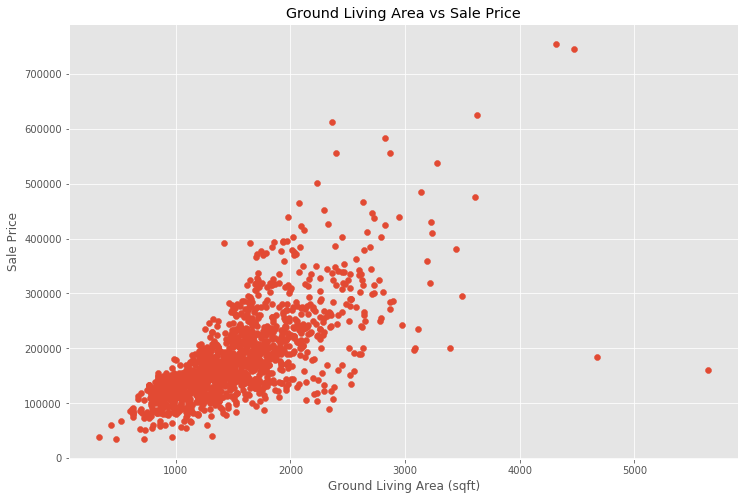

In [125]:
fig = plt.figure(figsize = (12, 8))
plt.scatter(df['GrLivArea'], df['SalePrice'])
plt.xlabel('Ground Living Area (sqft)')
plt.ylabel('Sale Price')
plt.title('Ground Living Area vs Sale Price');

What if we have a house that we want to predict that is 3000 sqft? 

/Users/jeffreyherman/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:214: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


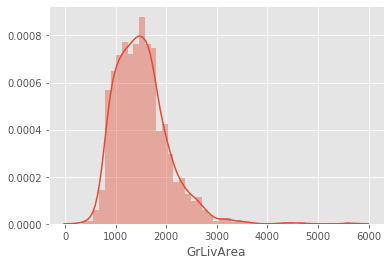

In [126]:
import seaborn as sns

sns.distplot(df['GrLivArea'])

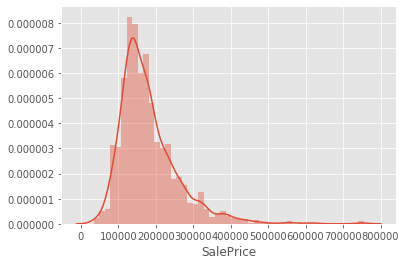

In [127]:
sns.distplot(df['SalePrice'])

In [128]:
import statsmodels.api as sm
import statsmodels.formula.api as smf


f = 'SalePrice~GrLivArea'
model = smf.ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1471.
Date:                Thu, 17 Oct 2019   Prob (F-statistic):          4.52e-223
Time:                        14:36:19   Log-Likelihood:                -18035.
No. Observations:                1460   AIC:                         3.607e+04
Df Residuals:                    1458   BIC:                         3.608e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.857e+04   4480.755      4.144      0.000    9779.612    2.74e+04
GrLivArea    107.1304      2.794     38.348      0.000     101.650     112.610
==============================================================================
Omnibus:                      261.166   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3432.287
Skew:                           0.410   Prob(JB):                         0.00
Kurtosis:                      10.467   Cond. No.                     4.90e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- R^2: How much of the change in price can be explained by the change in GrLivArea (1 means 100% of the change in the dependent variable can be explained by the independent variable)
- Adjusted R^2: Will be used in Multiple Linear Regression
- P Value: Is the independent variable statistically significant (looking for it be less than 0.05)
- Regression coefficient: How much does the dependent variable change when the independent variable increases by 1

#### If we increased the Ground Living Area by 10 square feet, how much would we expect the sale price to increase/decrease?

A house with 3000 sqft, would cost.....

In [129]:
model.params

Intercept    18569.025856
GrLivArea      107.130359
dtype: float64

In [130]:
model.params['Intercept'] + (3000 * model.params['GrLivArea'])

339960.10275396286

In [131]:
model.predict(df['GrLivArea'])

0       201761.939688
1       153767.538871
2       209903.846969
3       202511.852201
4       254041.554863
5       164480.574768
6       200047.853945
7       242471.476095
8       208618.282662
9       133948.422463
10      129984.599181
11      267539.980093
12      116271.913233
13      178621.782151
14      152803.365641
15      110058.352413
16      126127.906258
17      157409.971076
18      137912.245744
19      162016.576512
20      273110.758759
21      137269.463591
22      210868.020200
23      132127.206360
24      132127.206360
25      189977.600202
26      114986.348926
27      201119.157534
28      189977.600202
29       74276.812519
            ...      
1430    215474.625636
1431    121199.909746
1432    122271.213335
1433    210546.629123
1434    139197.810052
1435    183228.387587
1436    111129.656003
1437    225544.879378
1438    150982.149538
1439    203368.895073
1440    292287.093014
1441    109415.570260
1442    233579.656301
1443    120557.127592
1444    17

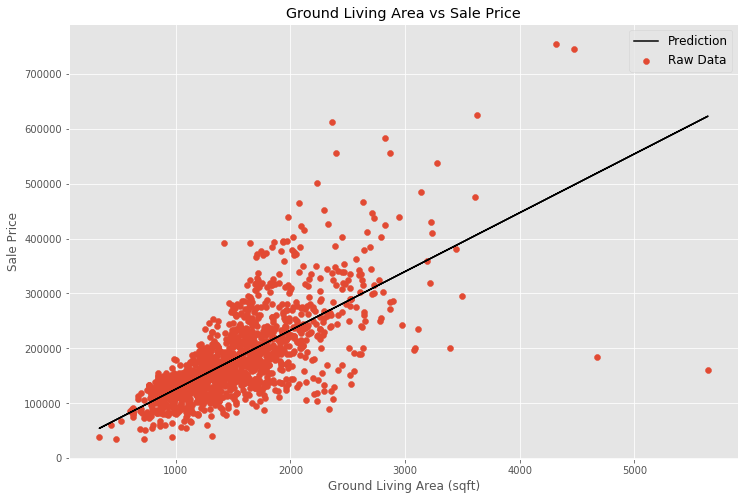

In [132]:
fig = plt.figure(figsize = (12, 8))
plt.scatter(df['GrLivArea'], df['SalePrice'], label = 'Raw Data')
plt.xlabel('Ground Living Area (sqft)')
plt.ylabel('Sale Price')
plt.title('Ground Living Area vs Sale Price')
plt.plot(df['GrLivArea'], model.predict(df['GrLivArea']), color = 'k', label = 'Prediction')
plt.legend(fontsize = 12);

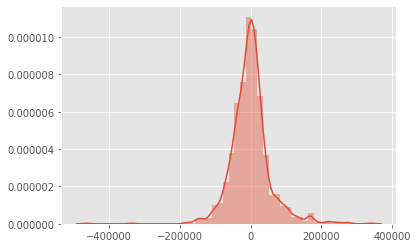

In [133]:
sns.distplot(model.resid)

### Assumptions of Single Variable Linear Regression 
- Residuals are normal
- Independent Variables are normally distributed 
- Linear Relationship between Independent Variables and Dependent Variables 

## Your Turn 
### Use LotArea to Predict Sale Price
- Does it do a better job of predicting sale price then GrLivArea?
- If we increase LotArea by 100, what does this do to the sale price?

## Multiple Regression 

Let's see if we can get a better model by using GrLivArea and LotArea to predict sale price

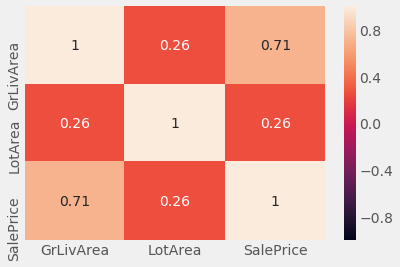

In [134]:
with plt.style.context('fivethirtyeight'):
    sns.heatmap(df[['GrLivArea', 'LotArea', 'SalePrice']].corr(), vmin=-1, vmax=1, annot = True)
plt.show()


### Assumptions of Multiple Linear Regression 
- Residuals are normal
- Independent Variables are normally distributed 
- Linear Relationship between Independent Variables and Dependent Variables 
- No multicollinearity between independent variables (independent variables are independent)

/Users/jeffreyherman/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:214: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


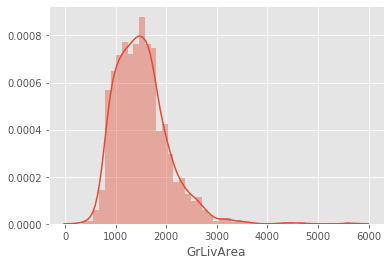

In [135]:
sns.distplot(df['GrLivArea'])

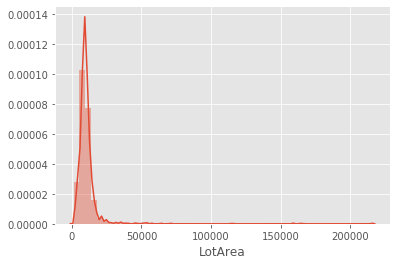

In [136]:
sns.distplot(df['LotArea'])

In [137]:
df_filter = df[df['LotArea'] < 50000]

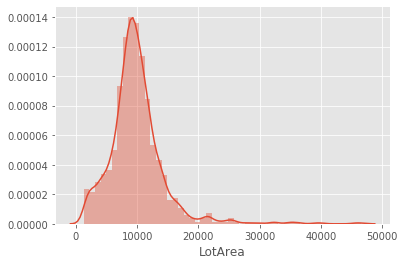

In [138]:
sns.distplot(df_filter['LotArea'])

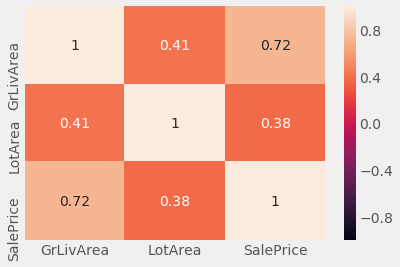

In [139]:
with plt.style.context('fivethirtyeight'):
    sns.heatmap(df_filter[['GrLivArea', 'LotArea', 'SalePrice']].corr(), vmin=-1, vmax=1, annot = True)
plt.show()

Text(0.5, 1.0, 'Lot Area vs Ground Living Area')

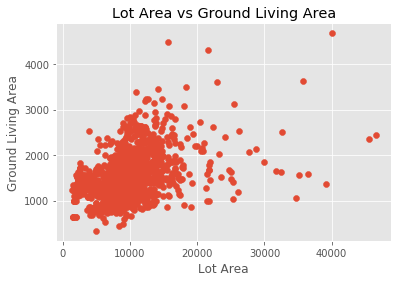

In [140]:
plt.scatter(df_filter['LotArea'], df_filter['GrLivArea'])
plt.xlabel('Lot Area')
plt.ylabel('Ground Living Area')
plt.title('Lot Area vs Ground Living Area')

Text(0.5, 1.0, 'Lot Area vs Sale Price')

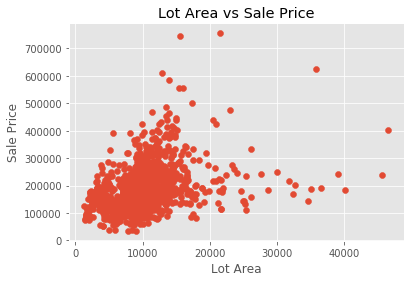

In [141]:
plt.scatter(df_filter['LotArea'], df_filter['SalePrice'])
plt.xlabel('Lot Area')
plt.ylabel('Sale Price')
plt.title('Lot Area vs Sale Price')

Text(0.5, 1.0, 'Ground Living Area vs Sale Price')

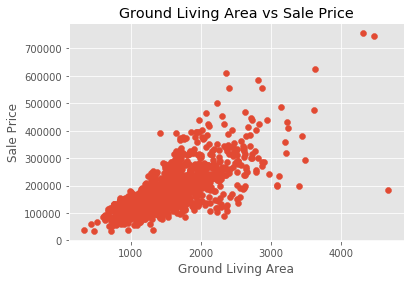

In [142]:
plt.scatter(df_filter['GrLivArea'], df_filter['SalePrice'])
plt.xlabel('Ground Living Area')
plt.ylabel('Sale Price')
plt.title('Ground Living Area vs Sale Price')

In [143]:
f = 'SalePrice~GrLivArea+LotArea'
model = smf.ols(formula=f, data=df_filter).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     821.6
Date:                Thu, 17 Oct 2019   Prob (F-statistic):          4.45e-239
Time:                        14:36:21   Log-Likelihood:                -17840.
No. Observations:                1449   AIC:                         3.569e+04
Df Residuals:                    1446   BIC:                         3.570e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5292.8002   4636.336      1.142      0.254   -3801.864    1.44e+04
GrLivArea    104.6497      3.020     34.649      0.000      98.725     110.574
LotArea        1.7054      0.339      5.037      0.000       1.041       2.370
==============================================================================
Omnibus:                      270.384   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1973.810
Skew:                           0.663   Prob(JB):                         0.00
Kurtosis:                       8.562   Cond. No.                     3.60e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.6e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

What does this tell us?


Text(0, 0.5, 'Predicted Price')

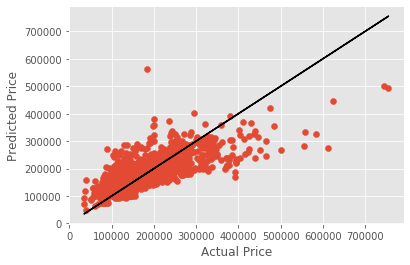

In [144]:
plt.scatter(df_filter['SalePrice'], model.predict(df_filter[['GrLivArea', 'LotArea']]))
plt.plot(df_filter['SalePrice'], df_filter['SalePrice'], color = 'k')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

/Users/jeffreyherman/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:214: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


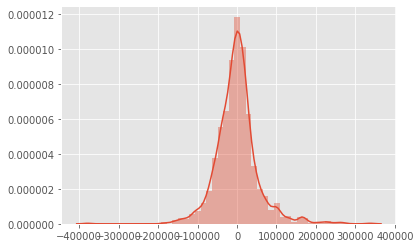

In [145]:
sns.distplot(model.resid)

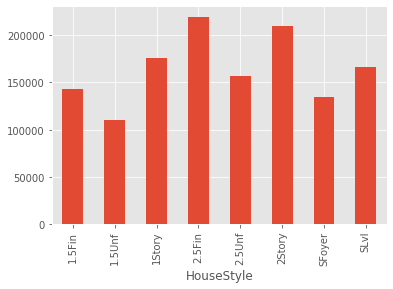

In [146]:
df.groupby('HouseStyle')['SalePrice'].mean().plot(kind = 'bar')

In [147]:
pd.get_dummies(df_filter['HouseStyle']).head(7)

,1.5Fin,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl
0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0
5,1,0,0,0,0,0,0,0
6,0,0,1,0,0,0,0,0


In [148]:
pd.get_dummies(df_filter['HouseStyle'], drop_first=True).tail(7)

,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl
1453,0,1,0,0,0,0,0
1454,0,1,0,0,0,0,0
1455,0,0,0,0,1,0,0
1456,0,1,0,0,0,0,0
1457,0,0,0,0,1,0,0
1458,0,1,0,0,0,0,0
1459,0,1,0,0,0,0,0


In [151]:
df_dummies = pd.concat([df_filter, pd.get_dummies(df_filter['HouseStyle'],
                                                 drop_first=True)], axis = 1)

In [153]:
df_dummies.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,SaleType,SaleCondition,SalePrice,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,WD,Normal,208500,0,0,0,0,1,0,0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,WD,Normal,181500,0,1,0,0,0,0,0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,WD,Normal,223500,0,0,0,0,1,0,0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,WD,Abnorml,140000,0,0,0,0,1,0,0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,WD,Normal,250000,0,0,0,0,1,0,0


In [154]:
df_dummies.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [155]:
f = 'SalePrice~GrLivArea+LotArea+1.5Unf+1Story+2.5Fin+2.5Unf+2Story+SFoyer+SLvl1'
model = smf.ols(formula=f, data=df_dummies).fit()
model.summary()

SyntaxError: invalid syntax (<unknown>, line 1)

In [156]:
my_col = df_dummies.columns.str.replace('2', 'two')
my_col = my_col.str.replace('1.5', 'one_five')
my_col = my_col.str.replace('1', 'one')
my_col = my_col.str.replace('.', '_')

In [157]:
df_dummies.columns = my_col

In [158]:
df_dummies.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Conditionone', 'Conditiontwo', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterioronest', 'Exteriortwond', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinTypeone', 'BsmtFinSFone',
       'BsmtFinTypetwo', 'BsmtFinSFtwo', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'onestFlrSF', 'twondFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'Gara

In [159]:
f = 'SalePrice~GrLivArea+LotArea+one_fiveUnf+oneStory+two_5Fin+two_5Unf+twoStory+SFoyer+SLvl'
model = smf.ols(formula=f, data=df_dummies).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     264.8
Date:                Thu, 17 Oct 2019   Prob (F-statistic):          1.01e-297
Time:                        14:37:57   Log-Likelihood:                -17682.
No. Observations:                1449   AIC:                         3.538e+04
Df Residuals:                    1439   BIC:                         3.544e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -7.119e+04   6142.352    -11.590      0.000   -8.32e+04   -5.91e+04
GrLivArea     133.8340      3.403     39.326      0.000     127.158     140.510
LotArea         0.4355      0.316      1.377      0.169      -0.185       1.056
one_fiveUnf  5.827e+04   1.37e+04      4.263      0.000    3.15e+04    8.51e+04
oneStory     6.724e+04   4423.464     15.201      0.000    5.86e+04    7.59e+04
two_5Fin     -9.54e+04    1.8e+04     -5.296      0.000   -1.31e+05   -6.01e+04
two_5Unf    -3.075e+04   1.52e+04     -2.028      0.043   -6.05e+04   -1002.008
twoStory     2.517e+04   4661.376      5.399      0.000     1.6e+04    3.43e+04
SFoyer       7.265e+04   9054.372      8.024      0.000    5.49e+04    9.04e+04
SLvl         4.944e+04   7222.977      6.844      0.000    3.53e+04    6.36e+04
==============================================================================
Omnibus:                      221.187   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3187.086
Skew:                           0.126   Prob(JB):                         0.00
Kurtosis:                      10.261   Cond. No.                     1.58e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We notice now that not all the p-values are significant.  

In [160]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

In [161]:
df_new = df_dummies[['SalePrice', 'GrLivArea', 'LotArea', 'one_fiveUnf', 
                    'oneStory', 'two_5Fin','two_5Unf', 'twoStory','SFoyer','SLvl']]

In [162]:
y = df_new['SalePrice']
X = df_new.drop('SalePrice', axis = 1)

In [163]:
X.head()

,GrLivArea,LotArea,one_fiveUnf,oneStory,two_5Fin,two_5Unf,twoStory,SFoyer,SLvl
0,1710,8450,0,0,0,0,1,0,0
1,1262,9600,0,1,0,0,0,0,0
2,1786,11250,0,0,0,0,1,0,0
3,1717,9550,0,0,0,0,1,0,0
4,2198,14260,0,0,0,0,1,0,0


In [164]:
X.tail()

,GrLivArea,LotArea,one_fiveUnf,oneStory,two_5Fin,two_5Unf,twoStory,SFoyer,SLvl
1455,1647,7917,0,0,0,0,1,0,0
1456,2073,13175,0,1,0,0,0,0,0
1457,2340,9042,0,0,0,0,1,0,0
1458,1078,9717,0,1,0,0,0,0,0
1459,1256,9937,0,1,0,0,0,0,0


In [165]:
scaler = MinMaxScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)

In [166]:
scaled_data

array([[0.31690465, 0.15787498, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.21372639, 0.18326746, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.33440811, 0.21970015, 0.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.46199908, 0.17094659, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.17134961, 0.18585087, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.21234454, 0.19070856, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [167]:
X_scaled = pd.DataFrame(scaled_data, columns = X.columns)

In [169]:
X_scaled.head()

,GrLivArea,LotArea,one_fiveUnf,oneStory,two_5Fin,two_5Unf,twoStory,SFoyer,SLvl
0,0.316905,0.157875,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.213726,0.183267,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.334408,0.219700,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.318517,0.182163,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.429295,0.286162,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [170]:
X_scaled.describe()

,GrLivArea,LotArea,one_fiveUnf,oneStory,two_5Fin,two_5Unf,twoStory,SFoyer,SLvl
count,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000
mean,0.270715,0.189182,0.009662,0.496894,0.005521,0.007591,0.305038,0.025535,0.044859
std,0.118215,0.101091,0.097852,0.500163,0.074124,0.086828,0.460582,0.157797,0.207065
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.182865,0.136899,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.258406,0.179955,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.331644,0.225220,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [171]:
linreg = LinearRegression()

In [172]:
selector = RFE(linreg, n_features_to_select=1)

In [173]:
selector = selector.fit(X_scaled, y)

In [174]:
X.columns[selector.support_]

Index(['GrLivArea'], dtype='object')

In [175]:
selector.ranking_

array([1, 9, 6, 5, 2, 3, 8, 4, 7])

Text(0, 0.5, 'Feature Importance')

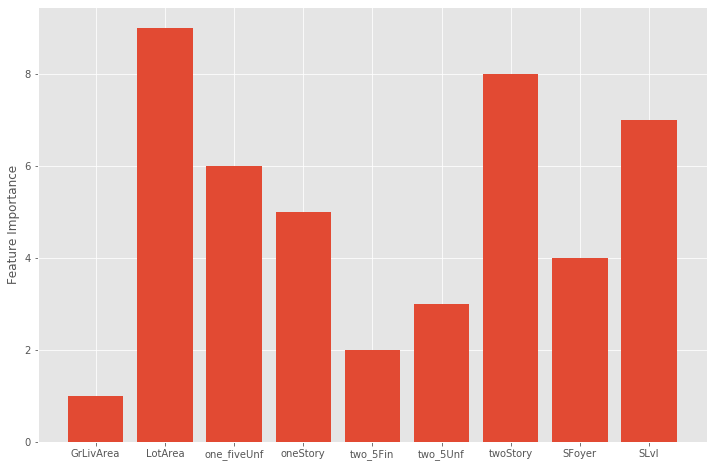

In [177]:
plt.figure(figsize = (12, 8))
plt.bar(X.columns, selector.ranking_)
plt.ylabel('Feature Importance')

In [180]:
r_squared = []

for x in range(1, 9):
    selector = RFE(linreg, n_features_to_select=x)
    selector = selector.fit(X_scaled, y)
    r_squared.append(selector.score(X_scaled, y))

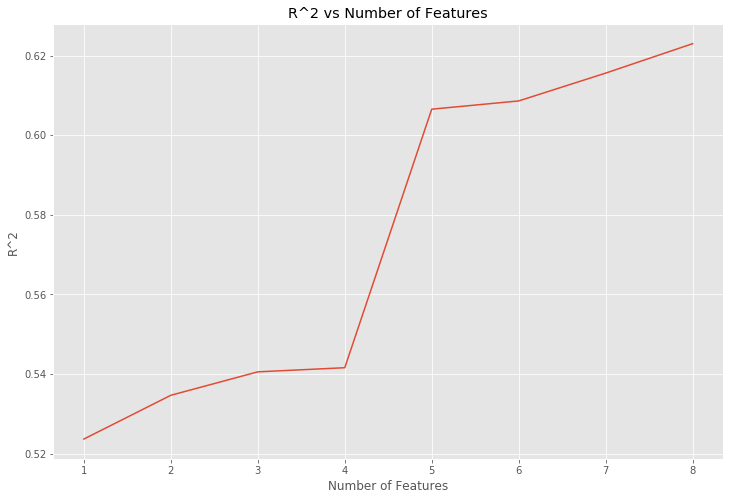

In [183]:
plt.figure(figsize = (12, 8))
plt.plot(range(1, 9), r_squared)
plt.xlabel('Number of Features')
plt.ylabel('R^2')
plt.title('R^2 vs Number of Features')
plt.show()

## Now it's your turn
- Add another feature that is categorical to the model 

https://www.datacamp.com/community/tutorials/tidyverse-tutorial-r